<a href="https://colab.research.google.com/github/rajirajeswari1476/Deep-Learning-Project/blob/main/DL_Image_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle


In [ ]:
TRAIN_DIR ='/content/train'
TEST_DIR = '/content/testdata'

In [ ]:
IMG_SIZE = 120
MODEL_NAME = 'NIKEvsADIDAS'

In [ ]:
def label_image(img):
  word_label = img.split('-')[0]
  if word_label == 'NIKE': return [1,0]
  elif word_label == 'ADIDAS': return [0,1]

In [ ]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
  label = label_image(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL


  img = Image.open(path)
  img = img.convert('L')
  img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
  #Create composite image by blending images using a transparency mask. ..
  # ANTIALIAS (a high-quality downsampling filter).

  train_data.append([np.array(img), np.array(label)])



shuffle(train_data)

100%|██████████| 11/11 [00:00<00:00, 740.91it/s]


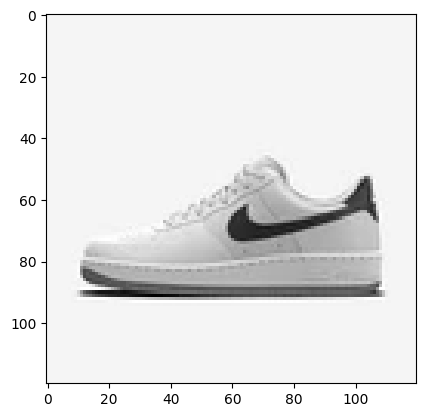

In [ ]:
plt.imshow(train_data[4][0], cmap='gist_gray')
plt.show()

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten


In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #adidas or nike 2 options so last layer has 2 neurons.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x, y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4545 - loss: 1.0073
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4545 - loss: 221.0319
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: 2.8450
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4545 - loss: 5.8886
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5455 - loss: 1.5636
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7273 - loss: 0.5675
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6364 - loss: 0.5963
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5455 - loss: 0.7477
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8182 - loss: 0.4854
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8182 - loss: 0.4845
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8182 - loss: 0.4551
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8182 - loss: 0.4244
Epoch 13/20
1/1 ━━━━━━━

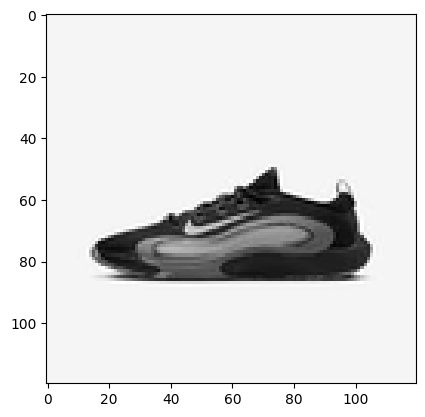

In [ ]:
img = Image.open('/content/NIKE-1')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)

plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [ ]:
# model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))
#model.predict([[6.7	,3.0,	5.2,	2.3]])
input_data = np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction = model.predict(input_data)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.9321122  0.06788778]]
